In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
# Load the dataset to examine its structure and contents
file_path = '../Data/Cleaned_merged_SIPRI_Region_ACLED.csv'
military_spending_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and columns
military_spending_df.head()

,Country,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,Region,Subregion,index_level,total_rank_from_avg_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
0,Brazil,1953,NaN,0.035955,NaN,1574.100082,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
1,Brazil,1957,NaN,0.044035,NaN,2374.421811,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
2,Brazil,1958,NaN,0.040675,NaN,2376.339962,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
3,Brazil,1959,NaN,0.029634,NaN,1885.411876,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
4,Brazil,1960,NaN,0.026791,NaN,1730.488673,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851


### Identify missing values

In [38]:
# Selecting relevant columns for clustering
# Based on expenditure metrics and scaled ranks related to military risks
selected_columns = [
    'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
    'Deadliness_scaled', 'Diffusion_scaled', 'Danger_scaled',
    'Fragmentation_scaled', 'total_score'
]

# Extract the relevant columns
clustering_df = military_spending_df[selected_columns]

# Checking for missing values in the selected columns
missing_values = clustering_df.isnull().sum()
missing_values

Expenditure-Share_of_GDP     366
Expenditure_Per_Capita      3277
Deadliness_scaled              0
Diffusion_scaled               0
Danger_scaled                  0
Fragmentation_scaled           0
total_score                    0
dtype: int64

### Imputing missing values

In [39]:
# Impute missing values with the median of each column
clustering_df.fillna(clustering_df.median(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = clustering_df.isnull().sum()
missing_values_after_imputation

C:\Users\swapn\AppData\Local\Temp\ipykernel_3664\2582340903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df.fillna(clustering_df.median(), inplace=True)


Expenditure-Share_of_GDP    0
Expenditure_Per_Capita      0
Deadliness_scaled           0
Diffusion_scaled            0
Danger_scaled               0
Fragmentation_scaled        0
total_score                 0
dtype: int64

### Data Normalization

In [40]:
# Initialize the StandardScaler to normalize the data
scaler = StandardScaler()

# Apply normalization to the selected features for clustering
normalized_data = scaler.fit_transform(clustering_df)

# Convert the normalized data back to a DataFrame for easier viewing
normalized_df = pd.DataFrame(normalized_data, columns=clustering_df.columns)

## Sampling and identify number of clusters using elbow method
- The optimal number of clusters can be inferred by looking for the "elbow" point, where the inertia starts to level off.
- In the sampled military expenditure data, the curve shows a steep decline initially, and then the rate of decrease starts to slow down.

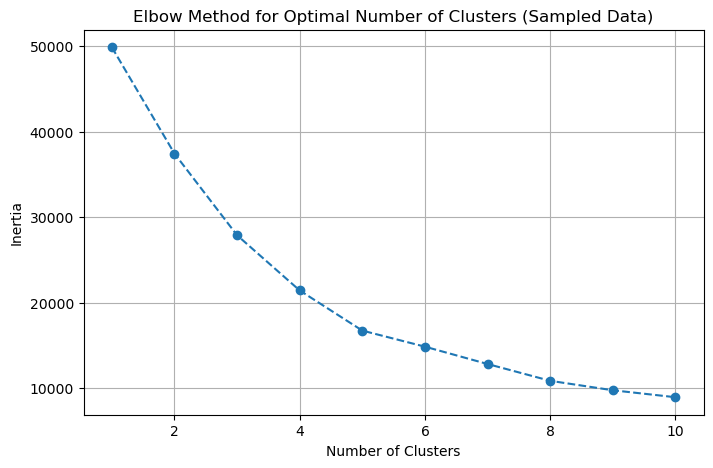

In [41]:
# Reduce the dataset size by randomly sampling a smaller subset (e.g., 10% of the data)
sampled_df = normalized_df.sample(frac=0.8, random_state=42)

# Re-run the Elbow Method for optimal number of clusters using the sampled data
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Sampled Data)')
plt.grid(True)
plt.show()

### Create 4 clusters

In [42]:
# Applying K-Means clustering using the optimal number of clusters (e.g., 4 based on Elbow Method)
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
clusters = kmeans.fit_predict(sampled_df)

# Add the cluster labels to the original dataframe for interpretation
sampled_with_clusters_df = clustering_df.loc[sampled_df.index].copy()
sampled_with_clusters_df['Cluster'] = clusters

# Display the first few rows of the dataframe with cluster assignments
sampled_with_clusters_df.head()

,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score,Cluster
6036,0.031048,56.692475,0.000250,0.000000,0.001081,0.001317,0.003,0
733,0.033432,3.681301,0.205189,0.007236,0.104662,0.009217,0.326,0
7016,0.021292,299.516982,0.000000,0.000000,0.000772,0.000658,0.001,0
4672,0.013247,59.280025,0.000000,0.000000,0.000463,0.000000,0.000,0
2716,0.008501,126.745190,0.000100,0.000000,0.000772,0.001317,0.002,0


### Clustered countries

In [43]:
# Add country information to the sampled dataset for visualization
sampled_with_clusters_df['Country'] = military_spending_df.loc[sampled_df.index, 'Country']

# Get the list of distinct countries by cluster
countries_by_cluster = sampled_with_clusters_df.groupby('Cluster')['Country'].unique()

# Print the list of distinct countries by cluster
for cluster, countries in countries_by_cluster.items():
    print(f"Cluster {cluster}:")
    print(", ".join(countries))
    print()

Cluster 0:
Nicaragua, Ethiopia, Spain, Hungary, Argentina, Burkina Faso, Serbia, Kosovo, Bahrain, Angola, Guinea, Belgium, Belarus, Egypt, Cape Verde, Belize, Peru, Zambia, South Africa, United Kingdom, Philippines, Jordan, Japan, Burundi, South Sudan, North Macedonia, Liberia, Kyrgyz Republic, Mozambique, Venezuela, India, Chile, Senegal, Niger, El Salvador, Malta, Cote d'Ivoire, Iran, Uzbekistan, Kenya, Uruguay, France, Seychelles, Romania, Slovenia, Canada, Algeria, Togo, Congo, DR, Pakistan, Paraguay, Qatar, Sweden, Uganda, Mali, Georgia, Ecuador, New Zealand, Latvia, Sri Lanka, Rwanda, Portugal, Central African Republic, Azerbaijan, Indonesia, Papua New Guinea, Dominican Republic, Guinea-Bissau, Iceland, Norway, Greece, Nepal, Malawi, Denmark, Gabon, Luxembourg, Benin, Italy, Thailand, Djibouti, Singapore, Armenia, Laos, Morocco, Timor Leste, Czechoslovakia, Brunei, Bosnia and Herzegovina, Austria, Namibia, Moldova, Croatia, Netherlands, Cameroon, Sierra Leone, Eswatini, Finland, 

### Correlation Matrix: Factors Impacting Military Spending

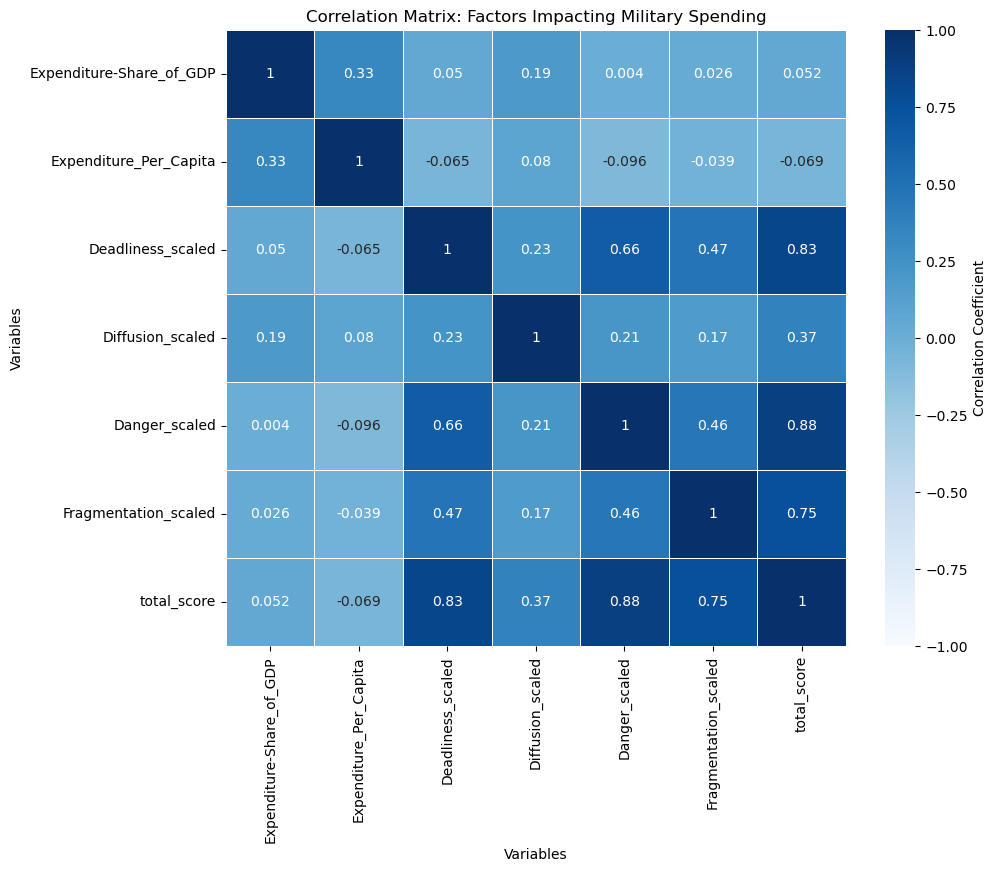

In [44]:
# Calculate correlation between military spending metrics and other variables to identify influencing factors
correlation_matrix = sampled_with_clusters_df[
    ['Expenditure-Share_of_GDP', 'Expenditure_Per_Capita', 'Deadliness_scaled', 
     'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled', 'total_score']
].corr()

# Plot heatmap to visualize correlations between military spending metrics and other variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'}, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Factors Impacting Military Spending')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


### Average Risk Metrics by Region
- **Africa** and **Europe** show relatively lower risk metrics across all categories, which might indicate that these two regions could be clustered into the same group, as they share similar risk profiles.
- **Asia & Oceania** and **Middle East** also show some similar patterns, with moderate values across most metrics, which might make them suitable for grouping together in another cluster.
- The **Americas** stands out due to its higher **Danger** value, suggesting it could form a distinct cluster from the others.

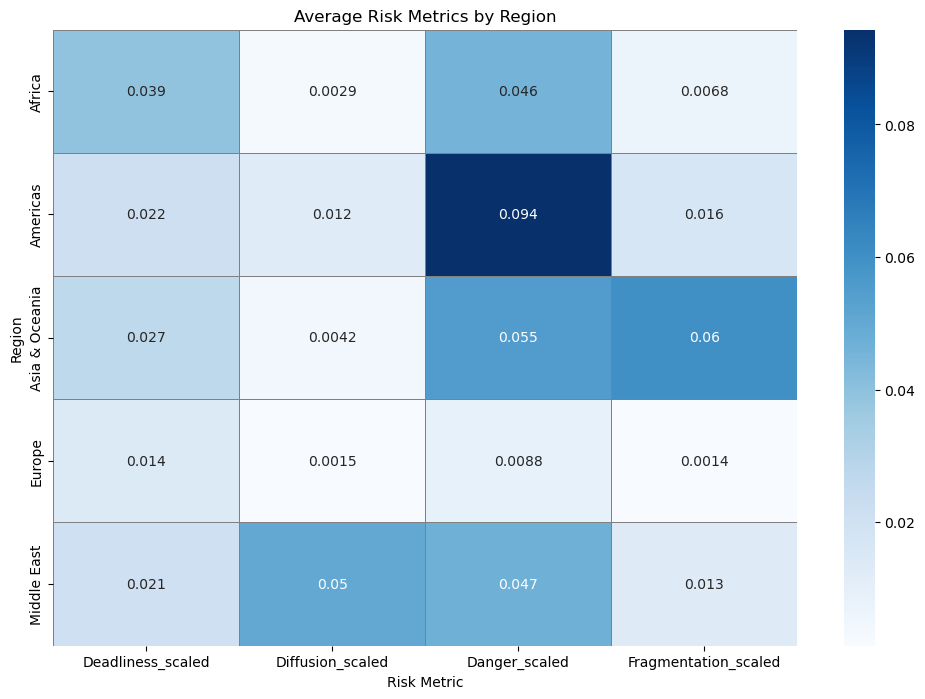

In [45]:
# Add region information to the sampled dataset for visualization
sampled_with_clusters_df['Region'] = military_spending_df.loc[sampled_df.index, 'Region']

# Calculate the average risk metrics per region
avg_risk_metrics = sampled_with_clusters_df.groupby('Region')[
    ['Deadliness_scaled', 'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled']
].mean()

# Plot heatmaps to visualize average risk metrics by region
plt.figure(figsize=(12, 8))
sns.heatmap(avg_risk_metrics, annot=True, cmap='Blues', linewidths=0.5, linecolor='grey')
plt.title('Average Risk Metrics by Region')
plt.xlabel('Risk Metric')
plt.ylabel('Region')
plt.show()

### Average Risk Metrics by Cluster Group
- Cluster 1 is characterized by high levels of danger and deadliness, possibly indicating high-risk environments.
- Cluster 0 is characterized by low risk across all metrics, likely representing safe or stable areas.
- Cluster 2 might highlight areas with concerns about diffusion (spread of risk), but lower danger and deadliness.
- Cluster 3 shows a mix of high danger, deadliness, and fragmentation, indicating regions that might be experiencing significant turmoil or crises.

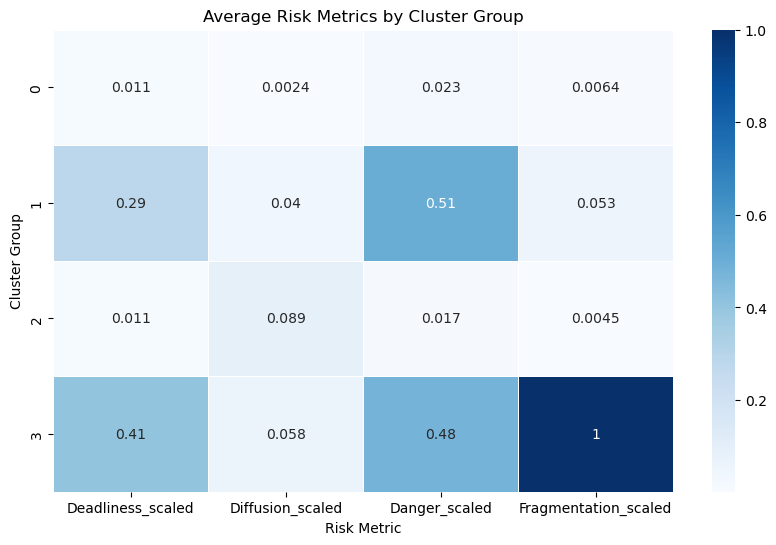

In [46]:
# Calculate the average risk metrics per cluster
avg_risk_metrics_per_cluster = sampled_with_clusters_df.groupby('Cluster')[
    ['Deadliness_scaled', 'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled']
].mean()

# Plot heatmaps to visualize average risk metrics by cluster group
plt.figure(figsize=(10, 6))
sns.heatmap(avg_risk_metrics_per_cluster, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Risk Metrics by Cluster Group')
plt.xlabel('Risk Metric')
plt.ylabel('Cluster Group')
plt.show()


### Average GDP Share by Region
- The Middle East stands out as the region with the highest military spending relative to GDP. This indicates heightened security needs and reflects regional instability and ongoing conflicts.
- Africa, Americas, Asia & Oceania, and Europe have similar average GDP shares allocated to military spending, ranging between 2.27% and 2.41%. These regions are likely maintaining a balance between economic growth and defense needs without excessive emphasis on military expenditure.

Average GDP Share per Region:
Region Africa: 0.0227
Region Americas: 0.0210
Region Asia & Oceania: 0.0241
Region Europe: 0.0226
Region Middle East: 0.0764


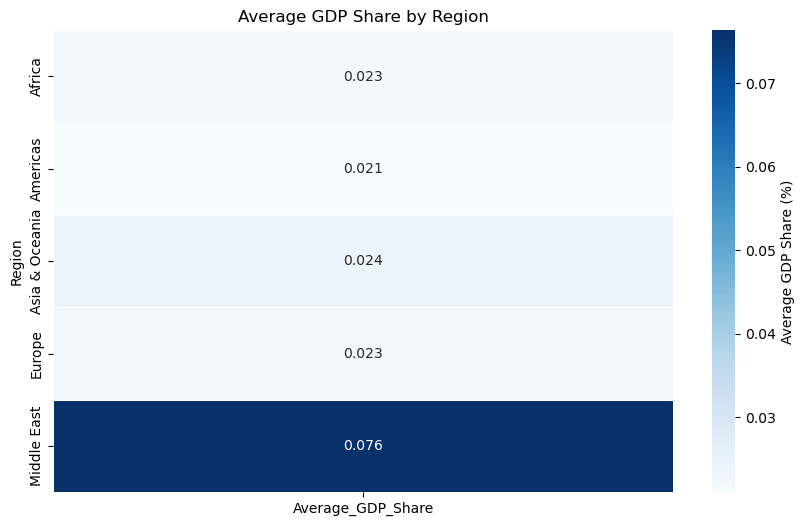

In [47]:
# Add GDP information to the sampled dataset for visualization
sampled_with_clusters_df['GDP'] = military_spending_df.loc[sampled_df.index, 'Expenditure-Share_of_GDP']

# Calculate the average GDP share per region
avg_gdp_per_region = sampled_with_clusters_df.groupby('Region')['GDP'].mean()

# Print the average GDP share per region
print("Average GDP Share per Region:")
for region, avg_gdp in avg_gdp_per_region.items():
    print(f"Region {region}: {avg_gdp:.4f}")

# Convert to DataFrame for heatmap visualization
avg_gdp_per_region_df = avg_gdp_per_region.reset_index()
avg_gdp_per_region_df.columns = ['Region', 'Average_GDP_Share']

# Plot heatmap to visualize the average GDP share per region
plt.figure(figsize=(10, 6))
sns.heatmap(avg_gdp_per_region_df.pivot_table(index='Region', values='Average_GDP_Share'),
            annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Average GDP Share (%)'})
plt.title('Average GDP Share by Region')
plt.xlabel('')
plt.ylabel('Region')
plt.show()

### Average GDP Share by Cluster Group
- Clusters 0, 1, and 3 show lower economic output, with Cluster 0 having the smallest GDP share. These clusters might represent smaller economies or regions with less economic influence.
- Cluster 2 could be associated with more economically developed or higher-output regions, contributing more significantly to global GDP.

Average GDP per Cluster:
Cluster 0: 0.0237
Cluster 1: 0.0338
Cluster 2: 0.0887
Cluster 3: 0.0366


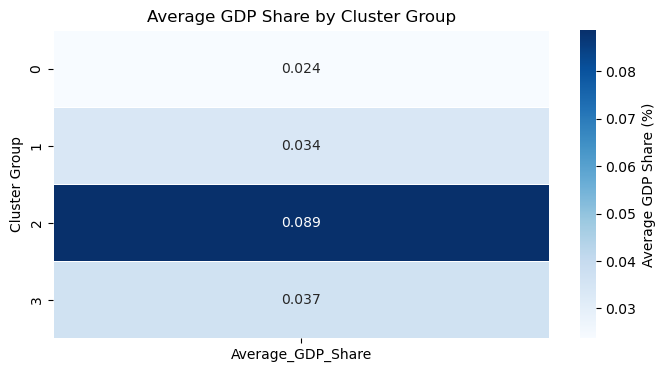

In [48]:
# Add GDP information to the sampled dataset for visualization
sampled_with_clusters_df['GDP'] = military_spending_df.loc[sampled_df.index, 'Expenditure-Share_of_GDP']

# Calculate the average GDP per cluster
avg_gdp_per_cluster = sampled_with_clusters_df.groupby('Cluster')['GDP'].mean()

# Print the average GDP per cluster
print("Average GDP per Cluster:")
for cluster, avg_gdp in avg_gdp_per_cluster.items():
    print(f"Cluster {cluster}: {avg_gdp:.4f}")

# Convert to DataFrame for heatmap visualization
avg_gdp_per_cluster_df = avg_gdp_per_cluster.reset_index()
avg_gdp_per_cluster_df.columns = ['Cluster', 'Average_GDP_Share']

# Plot heatmap to visualize the average GDP share per cluster
plt.figure(figsize=(8, 4))
sns.heatmap(avg_gdp_per_cluster_df.pivot_table(index='Cluster', values='Average_GDP_Share'),
            annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Average GDP Share (%)'})
plt.title('Average GDP Share by Cluster Group')
plt.xlabel('')
plt.ylabel('Cluster Group')
plt.show()

### Average Military Spending Metrics by Region (GDP & Per Capita)
- The Middle East has the highest military spending, both in terms of GDP share and per capita expenditure, indicating a significant focus on defense due to regional instability.
- Europe also has a relatively high per capita expenditure, though its GDP share is similar to that of other regions.
- Africa has the lowest per capita expenditure, reflecting economic limitations and less emphasis on defense compared to other regions.
- Americas and Asia & Oceania maintain moderate spending across both metrics, indicating a balanced approach to military investment.

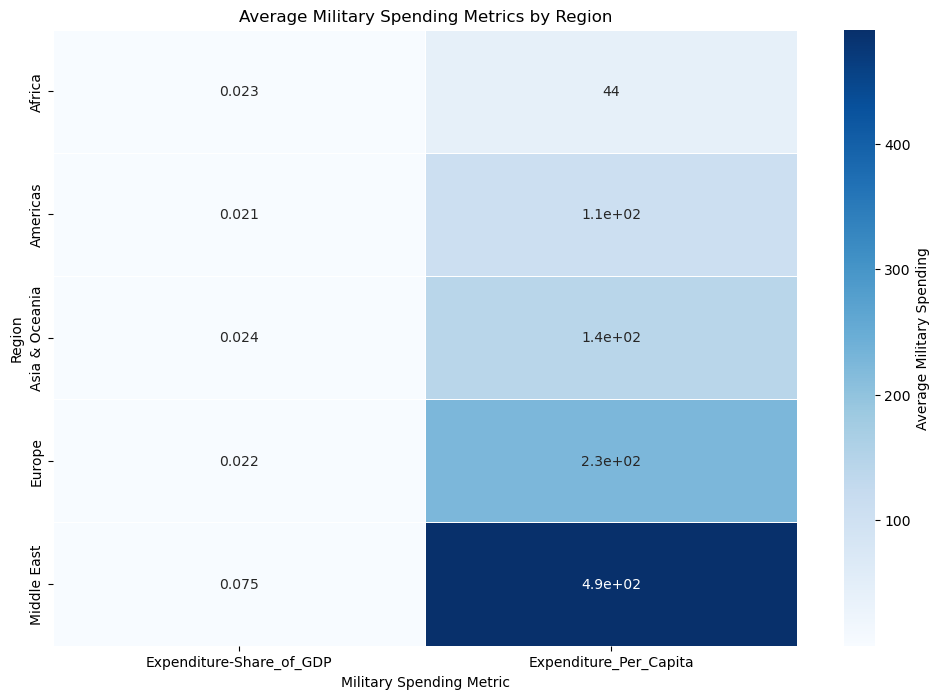

In [49]:
# Calculate the average military spending metrics per region
avg_military_spending_per_region = sampled_with_clusters_df.groupby('Region')[
    ['Expenditure-Share_of_GDP', 'Expenditure_Per_Capita']
].mean()

# Plot heatmap to visualize average military spending metrics by region
plt.figure(figsize=(12, 8))
sns.heatmap(avg_military_spending_per_region, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Average Military Spending'})
plt.title('Average Military Spending Metrics by Region')
plt.xlabel('Military Spending Metric')
plt.ylabel('Region')
plt.show()



### Average Military Spending Metrics by Cluster Group (GDP & Per Capita)
- Cluster 0 likely consists of regions with low military expenditure.
- Clusters 1 and 3 show moderate spending, with Cluster 3 having slightly higher per capita military expenditure than Cluster 1.
- Cluster 2 represents regions with high military spending both in terms of GDP share and per capita, possibly indicating countries with significant defense investments.

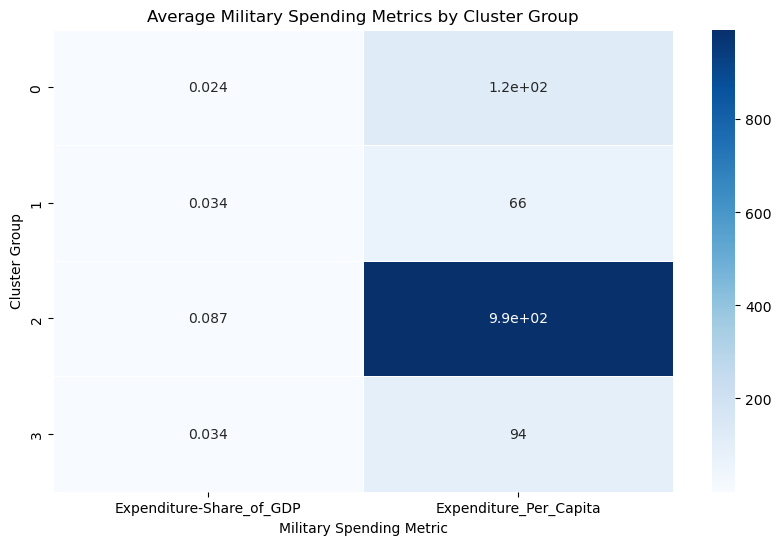

In [50]:
# Calculate the average military spending metrics per cluster
avg_military_spending_per_cluster = sampled_with_clusters_df.groupby('Cluster')[
    ['Expenditure-Share_of_GDP', 'Expenditure_Per_Capita']
].mean()

# Plot heatmap to visualize average military spending metrics by cluster group
plt.figure(figsize=(10, 6))
sns.heatmap(avg_military_spending_per_cluster, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Military Spending Metrics by Cluster Group')
plt.xlabel('Military Spending Metric')
plt.ylabel('Cluster Group')
plt.show()


### Regional Stability
- Cluster 0 dominates in most regions, particularly in Africa, Asia & Oceania, and Europe, suggesting that this cluster may represent a more stable or common pattern across these regions.
- Cluster 1 appears to be more spread out across regions like the Americas and the Middle East, while its presence in Asia & Oceania and Europe is minimal.
- Cluster 2 is more isolated, with significant presence only in Africa, Asia & Oceania, and the Americas.
- Cluster 3 has a noteworthy presence in the Middle East, which contrasts with its near absence in other regions.

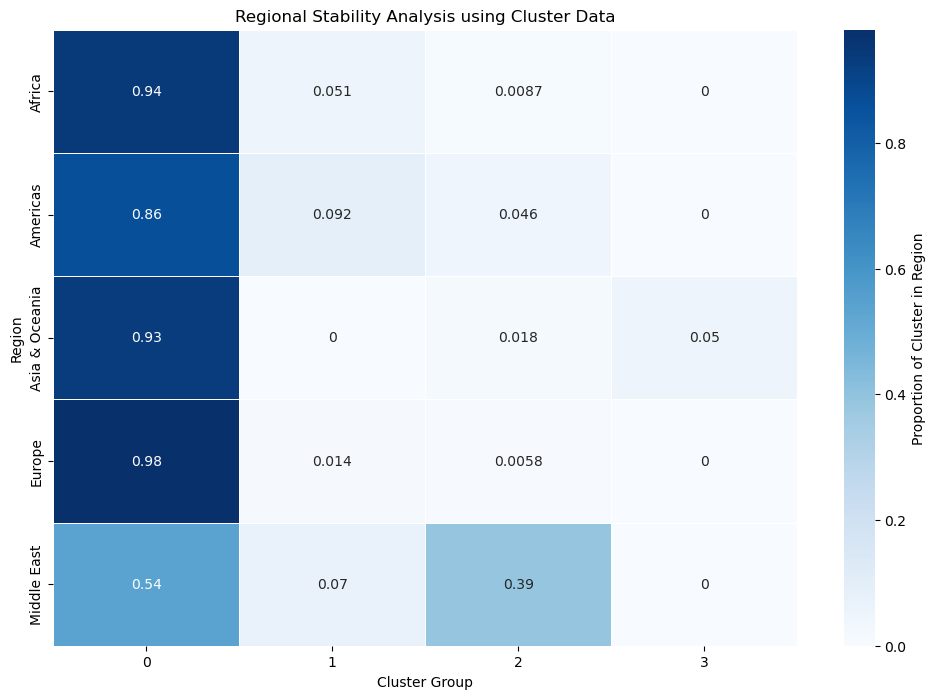

In [51]:
# Add region information to the sampled dataset for regional analysis
sampled_with_clusters_df['Region'] = military_spending_df.loc[sampled_df.index, 'Region']

# Calculate the proportion of each cluster in each region to analyze stability
regional_cluster_distribution = sampled_with_clusters_df.groupby('Region')['Cluster']\
    .value_counts(normalize=True).unstack(fill_value=0)

# Plot heatmap to visualize the distribution of clusters by region
plt.figure(figsize=(12, 8))
sns.heatmap(regional_cluster_distribution, annot=True, cmap='Blues', linewidths=0.5, \
            cbar_kws={'label': 'Proportion of Cluster in Region'})
plt.title('Regional Stability Analysis using Cluster Data')
plt.xlabel('Cluster Group')
plt.ylabel('Region')
plt.show()


<div class="alert alert-block alert-info">

**References**

ChatGPT, (2024) GPT-4o version, OpenAI. [Large language model]. https://chatgpt.com/


</div>
